# Introduction 

This report has analysed approx. 16,000 rows of historical video games data to provide Ice with insights into short and mid-term trends of the industry. 

Highlights of this report: 

- Average user ratings do not differ significantly between Xbox One and PC games 
- Users rate action games significantly better than sports games  
- PS4, XOne, 3DS and PC were the most popular gaming platforms in 2016 
- PS3, X360, Wii should no longer be reckoned with 
- User and expert ratings significantly affect sales of games 
- 'Fast' games (Shooter, action, sports) are more popular than slower-paced games (puzzles, strategy, simulation) 
- There is strong regional variation in preferences for platforms and genres 
- The video games' industries growth rates have been in steady decline since 2008 

The remainder of the report is structured as follows. First, the data preparation process will be presented. In the second part, I will present the exploratory data analysis before moving to a more rigorous statistical analysis of two hypotheses. The last part summarises the findings. 


# Open Dataset and Study General Information

A first look at the data is important to see if we have all the information that we need to conduct our analysis and how much pre-processing will be necessary to get the data in the correct format. The info method is a useful tool to get an overview of the variables contained in the data, number of missing values as well as the data types of all variables. 

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
import math as mt 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
try:
    games= pd.read_csv("games.csv")
except:
    games= pd.read_csv("/datasets/games.csv")


games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


It seems that the following variables have missing values: ```Name```,```Year_of_Release```, ```Genre```, ```Critic_Score```, ```User_Score``` and ```Rating```. Moreover, the data types of some columns should be changed. Before moving to the analysis, we thus need to figure out what to do with these columns. The next part will address these issues. 

# Prepare the data 

The data preparation process starts with changing all column names to lower case as this will save valuable time during the whole process of data manipulation. Afterwards, the missing values of each column will be dealt with. If the available information allows us to estimate the real values, the NAs will be replaced. If not, I will replace them with  negative numbers or 0s as placeholders (in the case of numeric variables) or leave them as NAs (in the case of categorical variables). The rationale behind this approach is that simply dropping the variables reduces our ability to analyse columns where these rows are not missing. If data from columns with placeholders is needed, I will of course filter the invalid rows out. Finally, I will change the values of some float columns to the integer type. 

In [2]:
# to lower case 
games.columns= games.columns.str.lower()

In [3]:
# Name NAs will be dropped since it's impossible to know which games we are talking about as almost all other information is missing as well

games['name']= games['name'].dropna()

To a certain degree, ```year_of_release``` can be replaced by group medians since many games are available at various platforms. The only risk inherent in this approach is that the game may have already been available at other platforms before the console in question even existed. In that case, the imputed value would be completely wrong. It is possible to control for this risk by doing THIS AND THAT. 

The other remaining missing values for this column can be obtained from an additional dataset that was retrieved from KAGGLE. Since names are likely to differ at times in both datasets and some games may simply be unavailable, one should not expect that this way we're able to replace all our missing values. To prevent a wrong allocation of values, I will control for the case that a game has been released on other consoles prior to release of the console. 

In [4]:
fill= games.groupby('name')['year_of_release'].transform('median')

games['year_of_release']= games['year_of_release'].fillna(fill)

In [5]:
from io import BytesIO
import requests
spreadsheet_id = '1j17E_C4t3ZSsxjQFRRaqTsU5pDpJzbNwWNoge4UWOP8'
try: 
    gamey= pd.read_csv('game_info.csv')
except: 
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    gamey = pd.read_csv(BytesIO(r.content))

In [6]:
gamey['released']= pd.to_datetime(gamey['released'], format= '%Y/%m/%d')
gamey['year_of_release']= gamey['released'].dt.year
gamey= gamey.query('year_of_release < 2017')

In [7]:
def age(x):
    if x == "Wii":
        return 2006 
    if x == 'NES':
        return 1983 
    if x == 'GB':
        return 1989
    if x == 'DS':
        return 2004
    if x == 'X360':
        return 2005
    if x == 'PS3':
        return 2006
    if x == 'PS2':
        return 2000 
    if x == 'SNES':
        return 1990
    if x == 'GBA':
        return 2001
    if x == 'PS4':
        return 2013 
    if x == '3DS':
        return 2011 
    if x == 'N64':
        return 1996
    if x == 'PS':
        return 1994
    if x == 'XB':
        return 2001
    if x == 'PC':
        return 1971
    if x == '2600':
        return 1977
    if x == 'PSP':
        return 2004 
    if x == 'XOne':
        return 2013
    if x == 'WiiU':
        return 2012 
    if x == 'GC':
        return 2002
    if x == 'GEN':
        return 1988
    if x == 'DC':
        return 1998
    if x == 'PSV':
        return 2011 
    if x == 'SAT':
        return 1995 
    if x == 'WS':
        return 1999
    if x == 'NG':
        return 2003
    if x == 'TG16':
        return 1987 
    if x == '3DO':
        return 1993
    if x == 'GG':
        return 1990 
    if x == 'PCFX':
        return 1994 
    
    
games['first_released']= games['platform'].apply(age)
beam= games[games['year_of_release'].isna()][['name','year_of_release']].merge(gamey[['name', 'year_of_release']], on= 'name', how= 'inner')

def years(x, y):
    s= 0
    for i in range(0, len(beam)):
        if (x == beam['name'][i]) and (y <= beam['year_of_release_y'][i]):
            s=beam['year_of_release_y'][i] 
            break
    return (s)

games.loc[games['year_of_release'].isnull(), 'year_of_release']= games[games['year_of_release'].isnull()].apply(lambda x: years(x['name'], x['first_released']), axis= 1)

The KAGGLE dataset can also be used to reduce the number of missing values in the ESRB rating and critic_score columns. The principal approach will be similar to the one used above. 

In [8]:
def rating_name(x):
    if x == 'Everyone 10+':
        return ('E10+')
    if x == 'Teen':
        return ('T')
    if x == 'Mature':
        return('M')
    if x == 'Everyone':
        return('E')
    if x == 'Adults Only':
        return ('AO')
    if x == 'Rating Pending':
        return ('RP')
    

esrb= games[games['rating'].isna()][['name','rating']].merge(gamey[['name', 'esrb_rating']], on= 'name', how= 'inner')
esrb= esrb[esrb['esrb_rating'].notnull()].reset_index(drop= True)
esrb['esrb_rating']= esrb['esrb_rating'].map(rating_name)


def rat_repl(x):
    s= 0
    for i in range(0, len(esrb)):
        if (x == esrb['name'][i]):
            s=esrb['esrb_rating'][i] 
            break
    return (s)

games.loc[games['rating'].isnull(),'rating']= games[games['rating'].isnull()]['name'].map(rat_repl)

In [9]:
critics= games[games['critic_score'].isna()][['name','critic_score']].merge(gamey[['name', 'metacritic']], on= 'name', how= 'inner')
critics= critics[critics['metacritic'].notnull()].reset_index(drop= True)
def crit_rat(x):
    f= -1
    for i in range(0, len(critics)):
        if x == critics['name'][i]:
            f= critics['metacritic'][i]
            break
    return (f)

games.loc[games['critic_score'].isnull(),'critic_score']= games[games['critic_score'].isnull()]['name'].map(crit_rat)

The remaining NAs in expert and user ratings will be imputed by -1 since 0 is a potential value on the scale. The user_score column also has values 'tbd' signifying 'To be determined'. since we need numeric values in the column for the analysis, I will replace these values with -2 to differentiate between NAs and 'tbd'. 

In [10]:
games['critic_score']= games['critic_score'].fillna(-1)
games['user_score']= games['user_score'].fillna(-1)
games.loc[games['user_score'] == 'tbd', 'user_score']= -2

Now the columns, ```year_of_release```  and ```critic_score``` are converted to integer and ```user_score``` is converted to float (since decimals are necessary). 

In [11]:
games[['year_of_release', 'critic_score']]= games[['year_of_release', 'critic_score']].astype('int')
games['user_score']= games['user_score'].astype(float)

Next, I will compute a column total-sales by summing up the sales data of all geographic regions in the dataset. 

In [12]:
games['total_sales']= games['eu_sales']+ games['na_sales']+games['jp_sales']+games['other_sales']

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,first_released,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,2006.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,0,1983.0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2006.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,2006.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,0,1989.0,31.38


#### Conclusion
This part prepared the dataset for the analysis. Specifically missing values were replaced as far as possible and data types were changed when it was considered necessary. MOreover, a total sales column was added to enable us to make the analysis on a global scale. 
Having prepared the data, I will now move on to the analyis of this report. 

# Exploratory Data Analysis 

## What are the long term patterns of the video games industry?

The following section analyses how sales of video games have varied over time and by platform. I will determine the most popular platforms and make estimates about the typical lifetime of a console broken down by geographic region. 

After this broader analysis I will narrow the focus to 2014-2016 for us to be able to see the most recent trends in the industry such as emerging big players and disappearing platforms. Specifically, this involves the following questions 

- Which platforms are leading in sales? Which ones are growing or shrinking? 
- Are those total differences relevant for our sales forecasts? What changes, if we consider average sales per game    on each platform instead of the total? 
- How do professional and user ratings affect the sales of PlayStation 4 games? 
- How do games available for PS4 fare on other platforms?
- What are the most and least profitable genres? 

Answers to these questions will allow the management to adjust the range of games offered on the platform. 

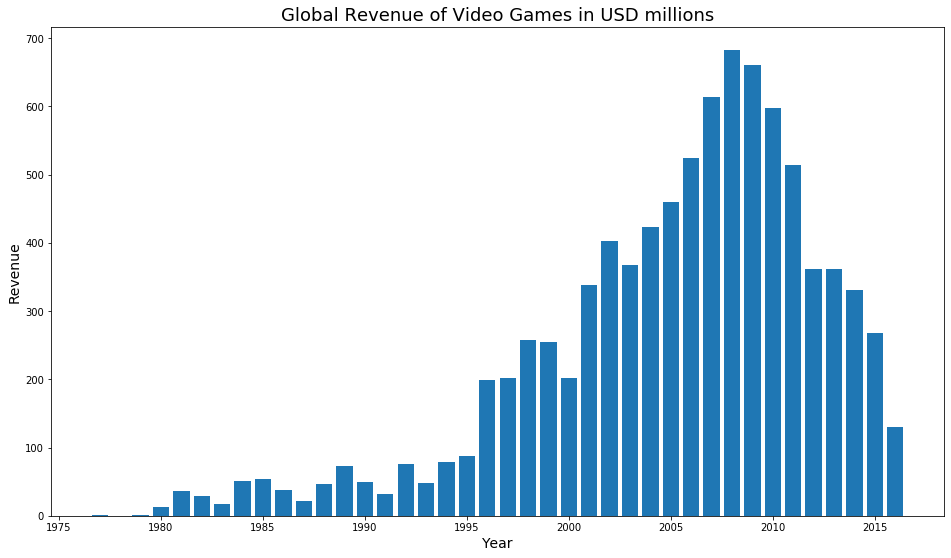

In [13]:
games_per_year= games.query('year_of_release > 0').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').reset_index()


plt.figure(figsize=(16,9))
plt.bar(games_per_year['year_of_release'], games_per_year['total_sales'])
plt.title('Global Revenue of Video Games in USD millions', fontsize= 18)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Revenue', fontsize= 14)
plt.show()

In [14]:
maxp= games_per_year['total_sales'].max()
last= games_per_year['total_sales'].tail(1)

decline=  (1-(last/maxp))

print("Video game sales peaked in 2008 with a total revenue of  {:.2f} million USD".format(maxp))
print("In 2016 the market volume of the video games industry was {:.2f} million USD".format(last[38]))
print("Video game revenue growth has declined by {:.2%} between 2008 and 2016".format(decline[38]))

Video game sales peaked in 2008 with a total revenue of  682.72 million USD
In 2016 the market volume of the video games industry was 130.03 million USD
Video game revenue growth has declined by 80.95% between 2008 and 2016


The video game industry has been in steep decline since its peak in 2008. While I leave the final interpretation of these trends to those people with more domain knowledge, it could be possible that the industry is lacking innovation in terms of games as well as consoles. New games and consoles are barely able to add new value since graphics and game features have not significantly changed in the last years. So it's possible that it may take things like VR-cameras to become market-ready to inject new life into the industry. 

### How have sales varied from platform to platform?



In [15]:
platforms= games.pivot_table(index= 'platform', values= 'total_sales', aggfunc= 'sum').reset_index().sort_values(by= 'total_sales',ascending= False).reset_index(drop= True)

highest= platforms[0:4]['platform']

print('The platforms with the highest revenue ever were', platforms[0:4])

The platforms with the highest revenue ever were   platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51


Historically the most popular platforms have been the PlayStation2 (1.25 billion game sales), XBox360 (961.42 million sales), Playstation3 (939.65 million sales) and Nintendo Wii(907.51 million sales). 

Now, I'm going to plot the historical development of sales figures of each platform using filled lineplots 

In [16]:
temp= games.query('year_of_release != 0 and platform in @highest')
temp= games.query('year_of_release != 0 and platform in @highest').pivot_table(index= ['year_of_release', 'platform'], values= 'total_sales', aggfunc= 'sum').reset_index()

In [17]:
def fun(x):
    names= pd.Series(x['platform'].unique()).head(1)
    if x['year_of_release'].min() > 2000:
        pp= range(2000,x['year_of_release'].min())
        for i in pp:
            eff= pd.DataFrame({'platform': names,
                               'year_of_release': i,
                               'total_sales':[0]})
            x= x.append(eff)
    else:
        x= x
    return x
    
temp= temp.groupby('platform').apply(fun).reset_index(drop= True).sort_values(['platform','year_of_release'])

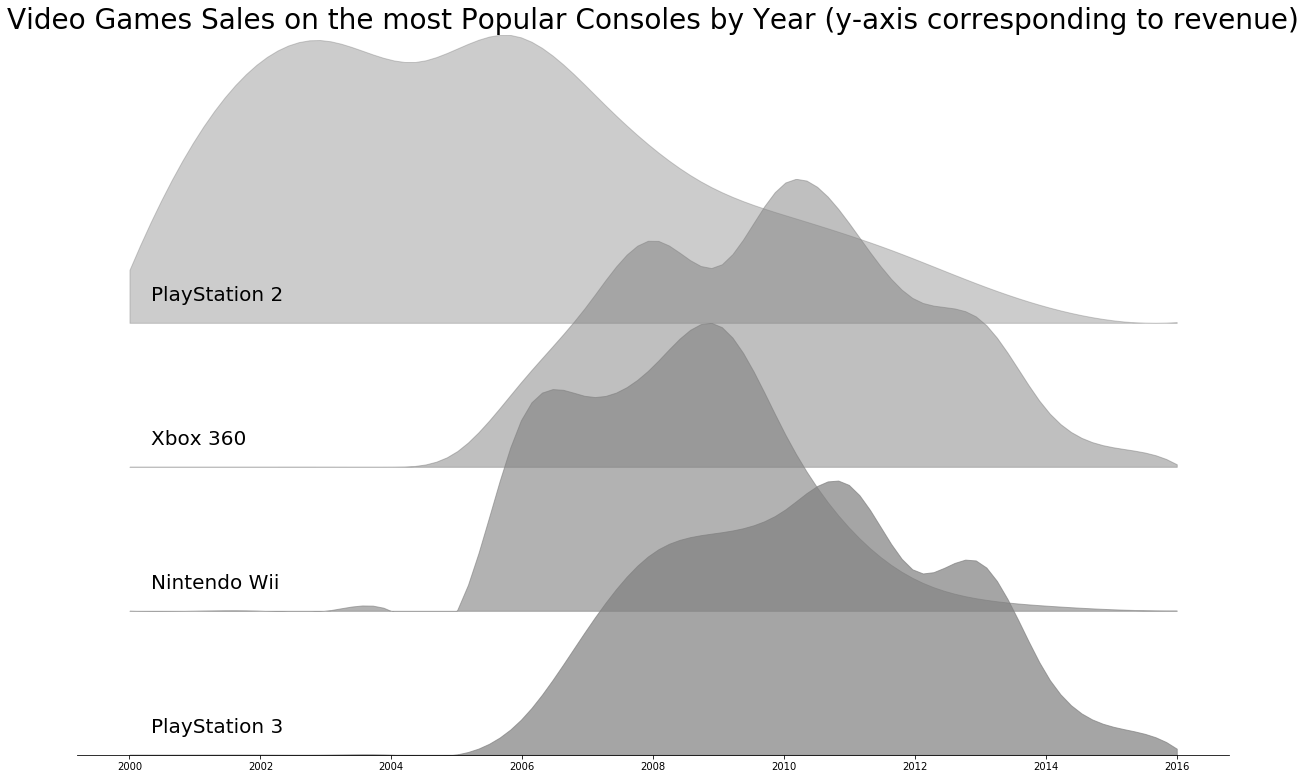

In [18]:
from scipy.interpolate import make_interp_spline, BSpline

x1= temp.query('platform== "PS3"')['year_of_release']
y1= temp.query('platform== "PS3"')['total_sales']
x2= temp.query('platform== "Wii"')['year_of_release']
y2= temp.query('platform== "Wii"')['total_sales']
x3= temp.query('platform== "X360"')['year_of_release']
y3= temp.query('platform== "X360"')['total_sales']
x4= temp.query('platform== "PS2"')['year_of_release']
y4= temp.query('platform== "PS2"')['total_sales']
x1_n = np.linspace(x1.min(), x1.max(), 100) 
spl1 = make_interp_spline(x1, y1, k=3)
y1_n= spl1(x1_n)
x2_n = np.linspace(x2.min(), x2.max(), 100) 
spl2 = make_interp_spline(x2, y2, k=3)
y2_n= spl2(x2_n)
x3_n = np.linspace(x3.min(), x3.max(), 100) 
spl3 = make_interp_spline(x3, y3, k=3)
y3_n= spl3(x3_n)
x4_n = np.linspace(x4.min(),x4.max(), 100) 
spl4 = make_interp_spline(x4, y4, k=3)
y4_n= spl4(x4_n)


fig= plt.figure(figsize=(16,4))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0, 0.5,1,1])
ax3 = fig.add_axes([0, 1,1,1])
ax4 = fig.add_axes([0, 1.5,1,1])

ax1.plot(x1_n,y1_n, alpha= 0, label= 'PlayStation 3')
ax1.set_yticklabels([])
ax1.fill_between(x1_n,y1_n, color= 'grey', alpha= 0.7)
ax2.plot(x2_n,y2_n,alpha= 0,label= 'Nintendo Wii')
ax2.fill_between(x2_n,y2_n, color= 'grey', alpha= 0.6)
ax2.set_yticklabels([])
ax3.plot(x3_n,y3_n,alpha= 0,label= 'Xbox 360')
ax3.fill_between(x3_n,y3_n, color= 'grey', alpha= 0.5)
ax3.set_yticklabels([])
ax4.plot(x4_n,y4_n,alpha= 0,label= 'PlayStation 2')
ax4.fill_between(x4_n,y4_n, color= 'grey', alpha= 0.4)
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax3.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax4.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax4.margins(y=0)
ax3.margins(y=0)
ax2.margins(y=0)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

ax1.patch.set_alpha(0)
ax2.patch.set_alpha(0)
ax3.patch.set_alpha(0)
ax4.patch.set_alpha(0)

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax3.set_ylim(bottom=0)
ax4.set_ylim(bottom=0)

ax1.legend(loc="lower left",prop={'size': 20}, frameon= False)
ax2.legend(loc="lower left",prop={'size': 20}, frameon= False)
ax3.legend(loc="lower left",prop={'size': 20},frameon= False)
ax4.legend(loc="lower left",prop={'size': 20},frameon= False)


ax4.set_title('Video Games Sales on the most Popular Consoles by Year (y-axis corresponding to revenue)',fontsize= 28)

plt.show()

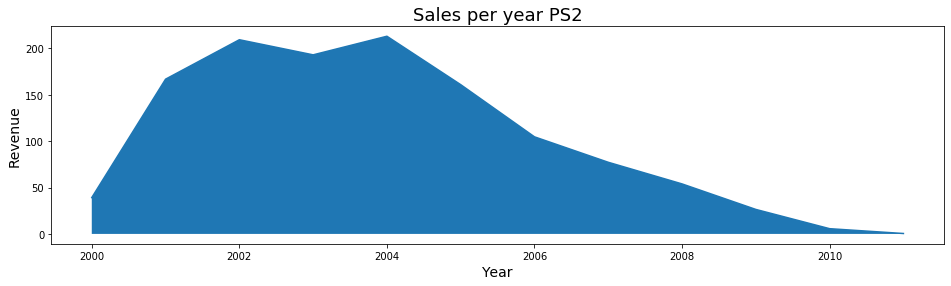

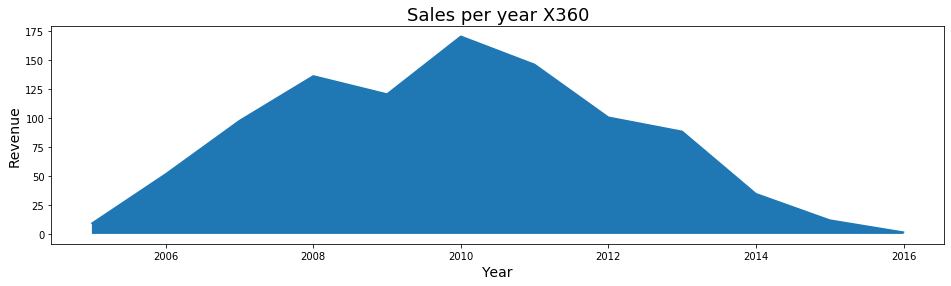

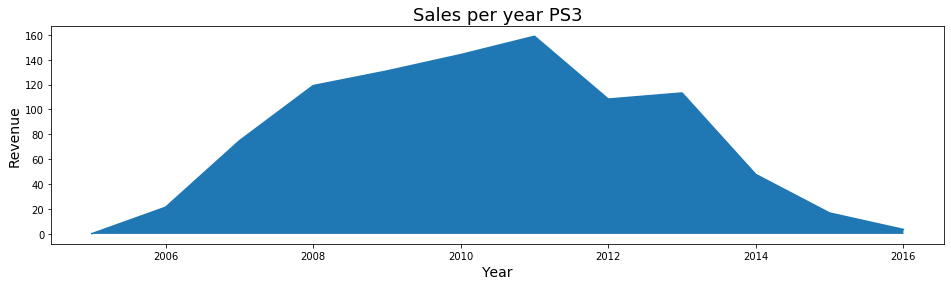

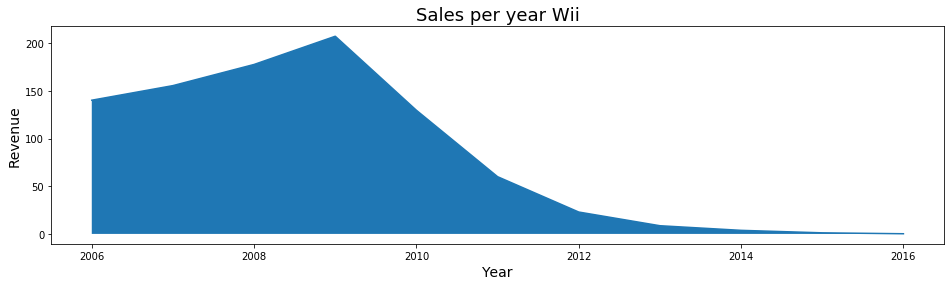

In [19]:
def sales_hist (x):
    f= "Sales per year "
    df= games.query('(year_of_release != 0) & platform == @x').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').reset_index()
    plt.figure(figsize=(16,4))
    plt.plot(df['year_of_release'],df['total_sales'])
    plt.title(f + x, fontsize= 18)
    plt.xlabel('Year', fontsize= 14)
    plt.ylabel('Revenue', fontsize= 14)
    plt.fill_between(df['year_of_release'],df['total_sales'])
    
for name in highest: 
    sales_hist(name)

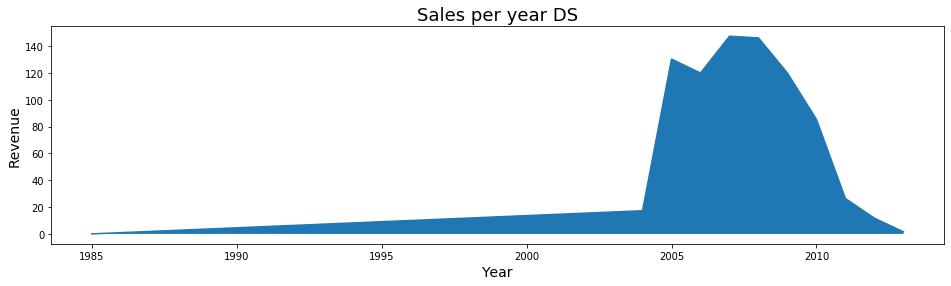

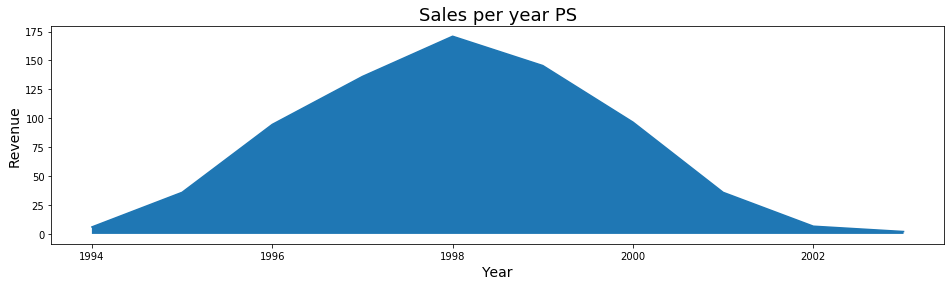

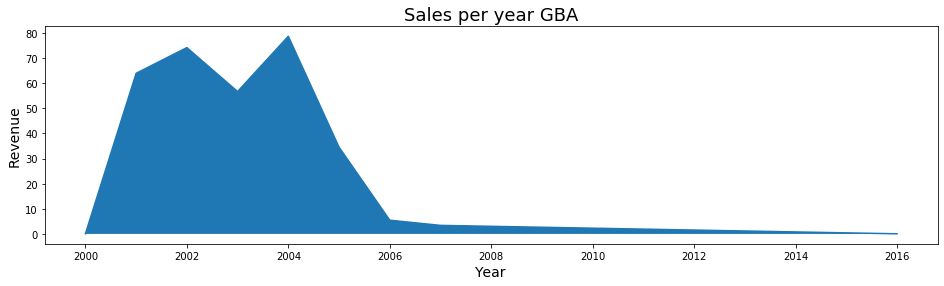

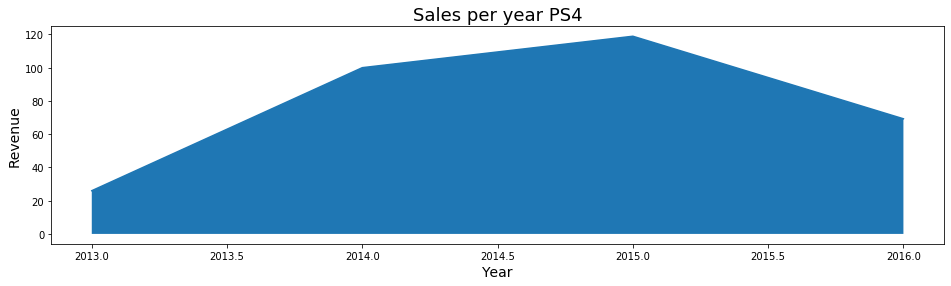

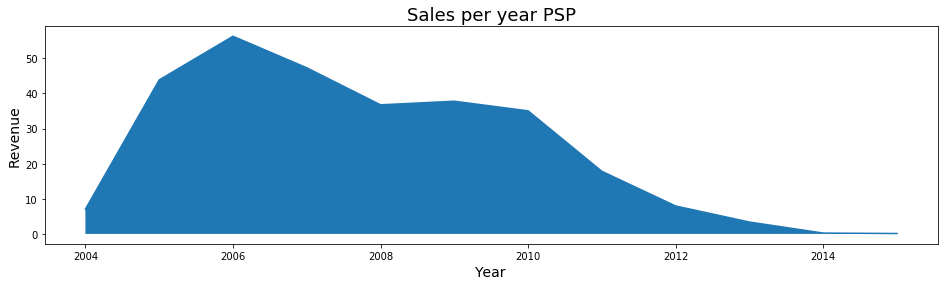

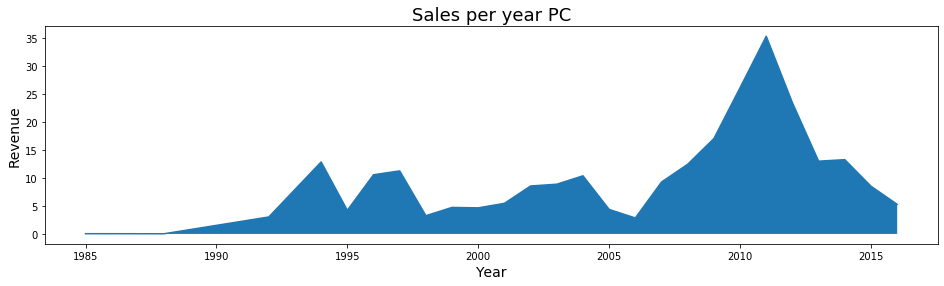

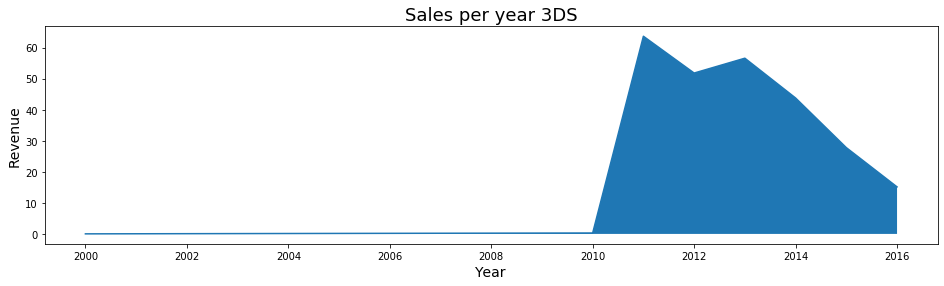

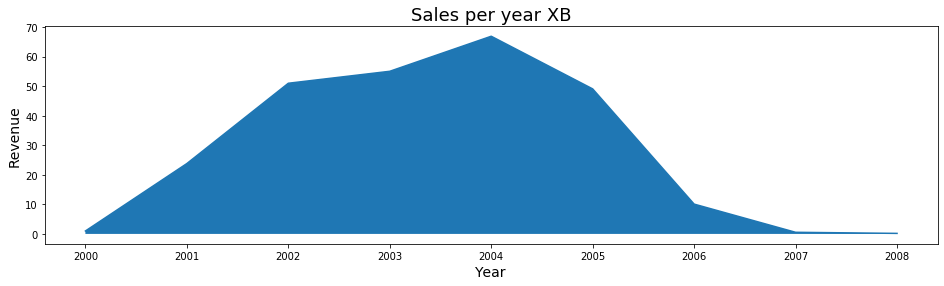

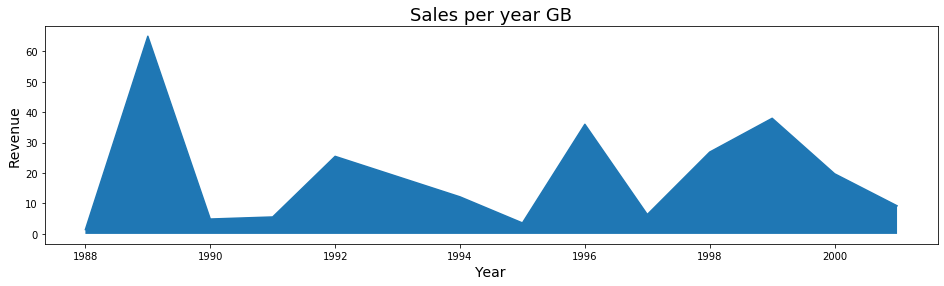

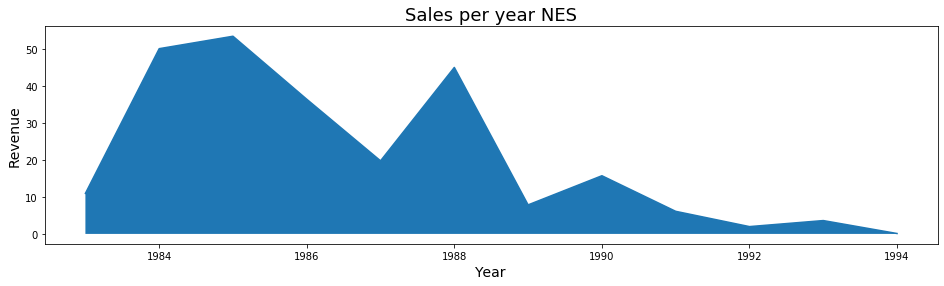

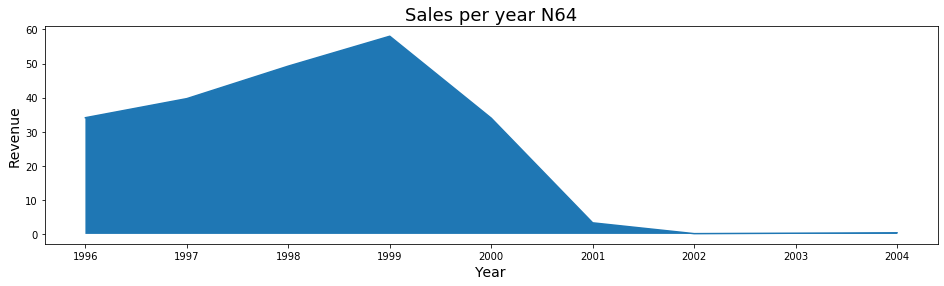

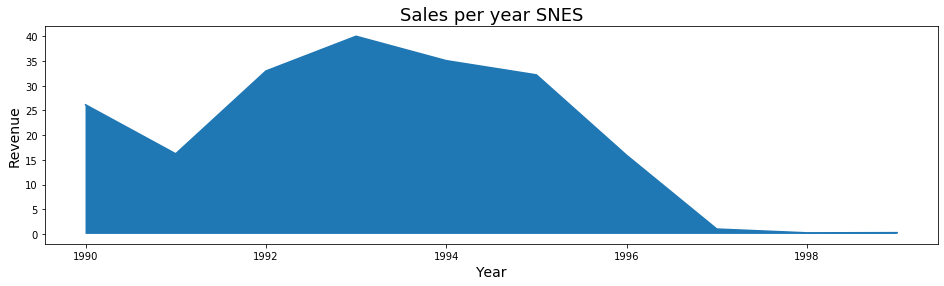

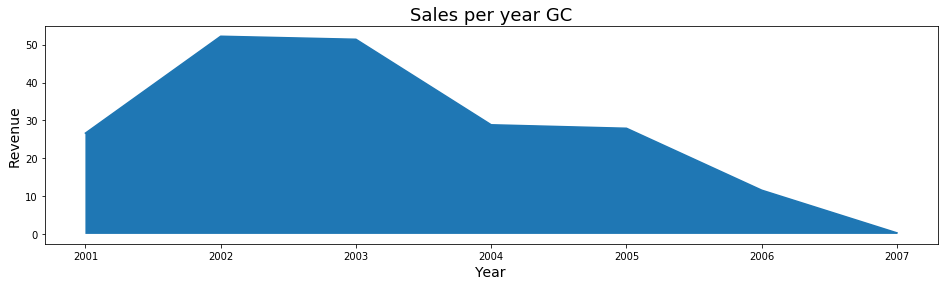

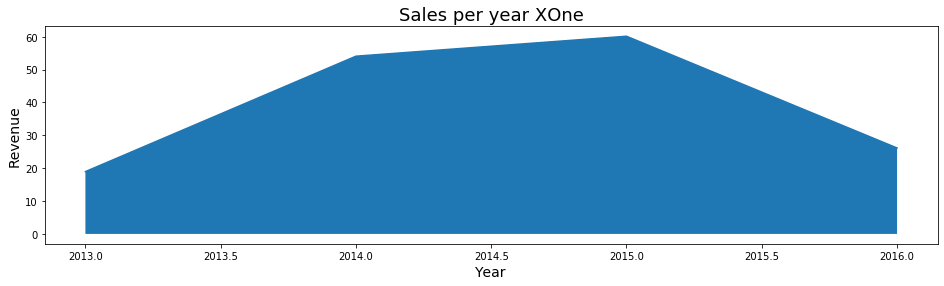

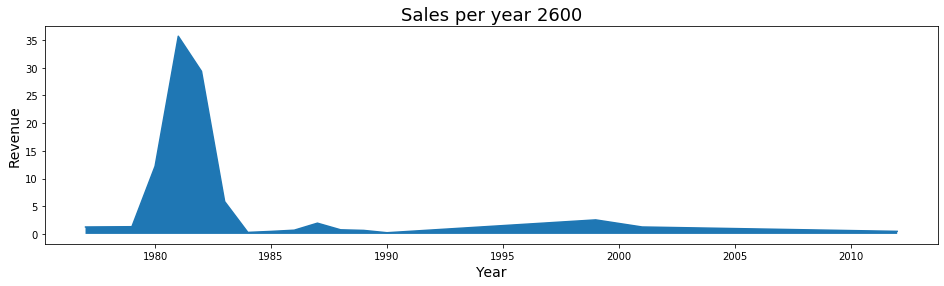

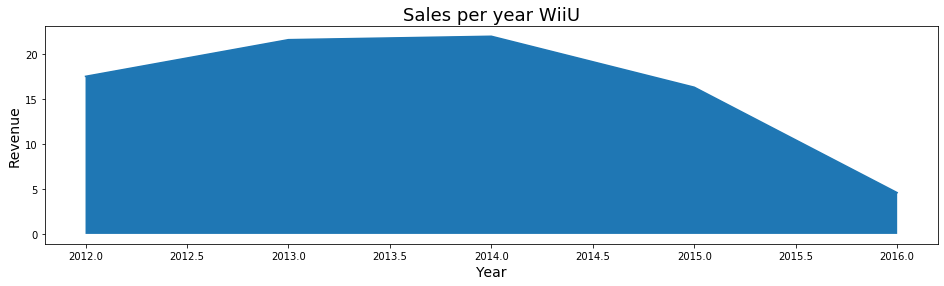

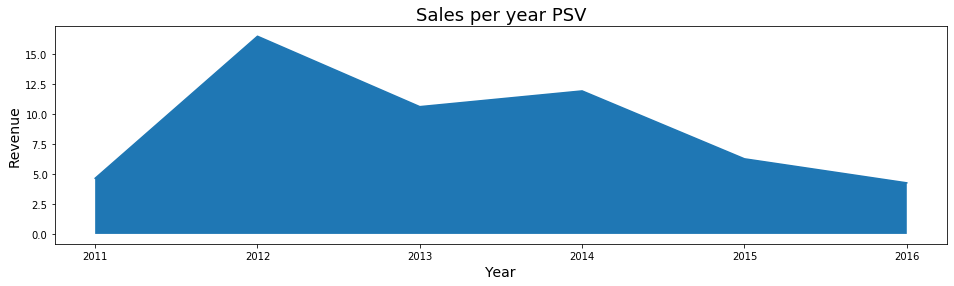

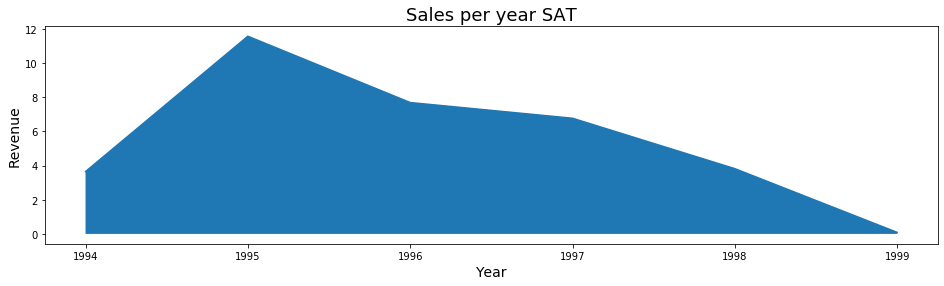

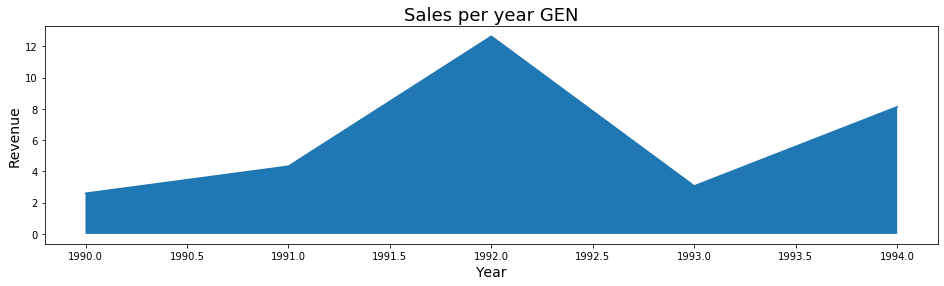

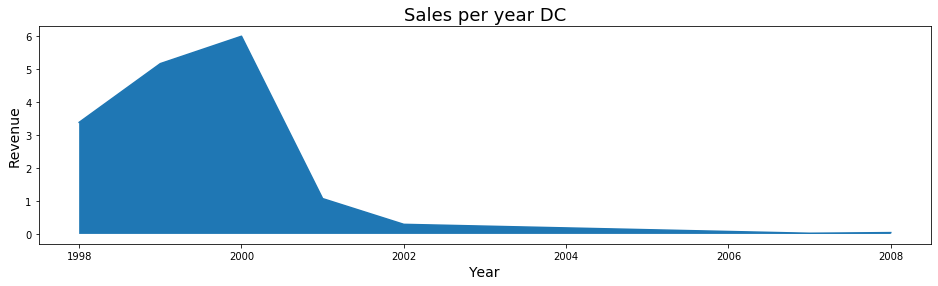

In [20]:
others= platforms[4:24]['platform']

for name in others:
    sales_hist(name)

### How long does it generally take for new platforms to appear and old ones to fade?

Some, previously very popular consoles have faded into irrelevance over the years. This includes PlayStation1 & 2, XBox360 or Nintendo Wii. The most plausible reason for that is that next generation consoles from the same manufacturers superseded these platforms and consequently the companies phased out production of new games for the old consoles.

To get a clearer sense of a console's lifespan, its typical lifecycle is calculated broken down by geographic region and manufacturer. 

The following parameters will be considered to define the 'typical lifecycle'. 

- The median years until consoles reach their peak revenue 
- The median years until sales drop below 20% of their peak. From that point a console can be considered dead (though this value has been chosen rather arbitrarily and has ultimately to be validated by experts)

(Note:
Despite the efforts to remove non-sensical ```year_of_release``` data, the barplots show that there are two games of Nintendo DS and 3DS have wrong values. The games dataset will be adjusted to account for these errors.)

In [21]:
games.query('year_of_release > 0 & platform== "3DS"').sort_values('year_of_release').head()
games.loc[(games['name'] == "Mario Tennis") & (games['platform']== "3DS"), 'year_of_release']= 2012
games= games.query('name != "Strongest Tokyo University Shogi DS"')

In [22]:
#This function returns a console's
#peak-year, the year when its sales dropped below 20% of its peak as well as the total lifetime of the consoleits total lifetime

def max_year (x, market):
    df= games.query('(year_of_release != 0) & platform == @x').pivot_table(index= 'year_of_release', values= market, aggfunc= 'sum').reset_index()
    df['percent_of_max']= df[market]/df[market].max()
    max_y= df.iloc[df[market].argmax()]['year_of_release']
    peak= max_y - df['year_of_release'].min()
    lost= df.query('year_of_release > @max_y & percent_of_max <= 0.2')['year_of_release'].min()
    over= lost-df['year_of_release'].min()
    total= 'None'
    if df['year_of_release'].max() < 2016:
        total= df['year_of_release'].max()-df['year_of_release'].min()
    return(pd.DataFrame([[x, peak, over, total]], columns=['platform','peak','over', 'total']))

#This function returns the brand of a console's manufacturer to enable the grouping 

def brand(x):
    if x in ["PS","PS2","PS3","PS4", "PSP","PSV"]:
        return('Sony')
    if x in ['X360', 'XB', 'XOne']:
        return('Microsoft')
    if x in ['Wii','DS', 'GB', 'GBA', '3DS', 'NES','N64', 'SNES', 'WiiU', 'GC']:
        return ('Nintendo')
    else:
        return ('Other')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid warnings (if necessary) by using the code below.
</div>

In [23]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [24]:
# North America typical lifetime 
data= pd.DataFrame(columns= ['platform','peak','over', 'total'])
consoles= highest.append(others[others!= "PC"])
for names in consoles:
    give= max_year(names, market='na_sales')
    data= data.append(give)
    
data= data.replace('None', np.nan)
data['platform']= data['platform'].astype('str')

data['brand']= data['platform'].map(brand)
data['brand_median_peak'] = data.groupby('brand')['peak'].transform('median')
data['brand_median_over'] = data.groupby('brand')['over'].transform('median')

NA_typ= data.pivot_table(index= 'brand', values= ['peak', 'over'], aggfunc= 'median').reset_index()

NA_typ

,brand,over,peak
0,Microsoft,7.5,4.0
1,Nintendo,6.0,2.0
2,Other,3.0,2.0
3,Sony,7.0,2.0


***North America***

- Microsoft: The average duration until sales peak is 4 years. After 7.5 years, the consoles become irrelevant 
- Sony: The average duration until sales peak is 2 years. After 7 years, the consoles become irrelevant 
- Nintendo: The average duration until sales peak is 2 years. After 6 years, the consoles become irrelevant
- Other: The average duration until sales peak is 2 years. After 3 years, the consoles become irrelevant 

In [25]:
# Europe typical lifetime 
data= pd.DataFrame(columns= ['platform','peak','over', 'total'])
consoles= highest.append(others[others!= "PC"])
for names in consoles:
    give= max_year(names, market='eu_sales')
    data= data.append(give)
    
data= data.replace('None', np.nan)
data['platform']= data['platform'].astype('str')

data['brand']= data['platform'].map(brand)
data['brand_median_peak'] = data.groupby('brand')['peak'].transform('median')
data['brand_median_over'] = data.groupby('brand')['over'].transform('median')

EU_typ= data.pivot_table(index= 'brand', values= ['peak', 'over'], aggfunc= 'median').reset_index()

EU_typ

,brand,over,peak
0,Microsoft,8.0,4.0
1,Nintendo,6.0,1.5
2,Other,3.0,2.0
3,Sony,7.0,2.5


***Europe***

- Microsoft: The average duration until sales peak is 4 years. After 8 years, the consoles become irrelevant 
- Sony: The average duration until sales peak is 2.5 years. After 7 years, the consoles become irrelevant 
- Nintendo: The average duration until sales peak is 1.5 years. After 6 years, the consoles become irrelevant
- Other: The average duration until sales peak is 2 years. After 3 years, the consoles become irrelevant 

In [26]:
# Japan typical lifetime 
data= pd.DataFrame(columns= ['platform','peak','over', 'total'])
consoles= highest.append(others[others!= "PC"])
for names in consoles:
    give= max_year(names, market='jp_sales')
    data= data.append(give)
    
data= data.replace('None', np.nan)
data['platform']= data['platform'].astype('str')

data['brand']= data['platform'].map(brand)
data['brand_median_peak'] = data.groupby('brand')['peak'].transform('median')
data['brand_median_over'] = data.groupby('brand')['over'].transform('median')

JP_typ= data.pivot_table(index= 'brand', values= ['peak', 'over'], aggfunc= 'median').reset_index()

JP_typ

,brand,over,peak
0,Microsoft,5.0,2.0
1,Nintendo,6.0,3.0
2,Other,4.5,1.0
3,Sony,9.0,3.0


***Japan***

- Sony: The average duration until sales peak is 3 years. After 9 years, the consoles become irrelevant 
- Nintendo: The average duration until sales peak is 3 years. After 6 years, the consoles become irrelevant
- Microsoft: The average duration until sales peak is 2 years. After 5 years, the consoles become irrelevant 
- Other: The average duration until sales peak is 1 year. After 4.5 years, the consoles become irrelevant 

In [27]:
# Others typical lifetime 
data= pd.DataFrame(columns= ['platform','peak','over', 'total'])
consoles= highest.append(others[others!= "PC"])
for names in consoles:
    give= max_year(names, market='other_sales')
    data= data.append(give)
    
data= data.replace('None', np.nan)
data['platform']= data['platform'].astype('str')

data['brand']= data['platform'].map(brand)
data['brand_median_peak'] = data.groupby('brand')['peak'].transform('median')
data['brand_median_over'] = data.groupby('brand')['over'].transform('median')

others_typ= data.pivot_table(index= 'brand', values= ['peak', 'over'], aggfunc= 'median').reset_index()

others_typ

,brand,over,peak
0,Microsoft,8.0,4.0
1,Nintendo,6.0,2.5
2,Other,3.0,2.0
3,Sony,8.0,3.0


***Others***

- Microsoft: The average duration until sales peak is 4 years. After 8 years, the consoles become irrelevant 
- Sony: The average duration until sales peak is 3 years. After 8 years, the consoles become irrelevant 
- Nintendo: The average duration until sales peak is 2.5 years. After 6 years, the consoles become irrelevant
- Other: The average duration until sales peak is 2 years. After 3 years, the consoles become irrelevant 

Now I will bring these insights together by visualising them in the form of barplots. The top row corresponds to peaks and the bottom row corresponds to the values until the consoles become irrelevant. 

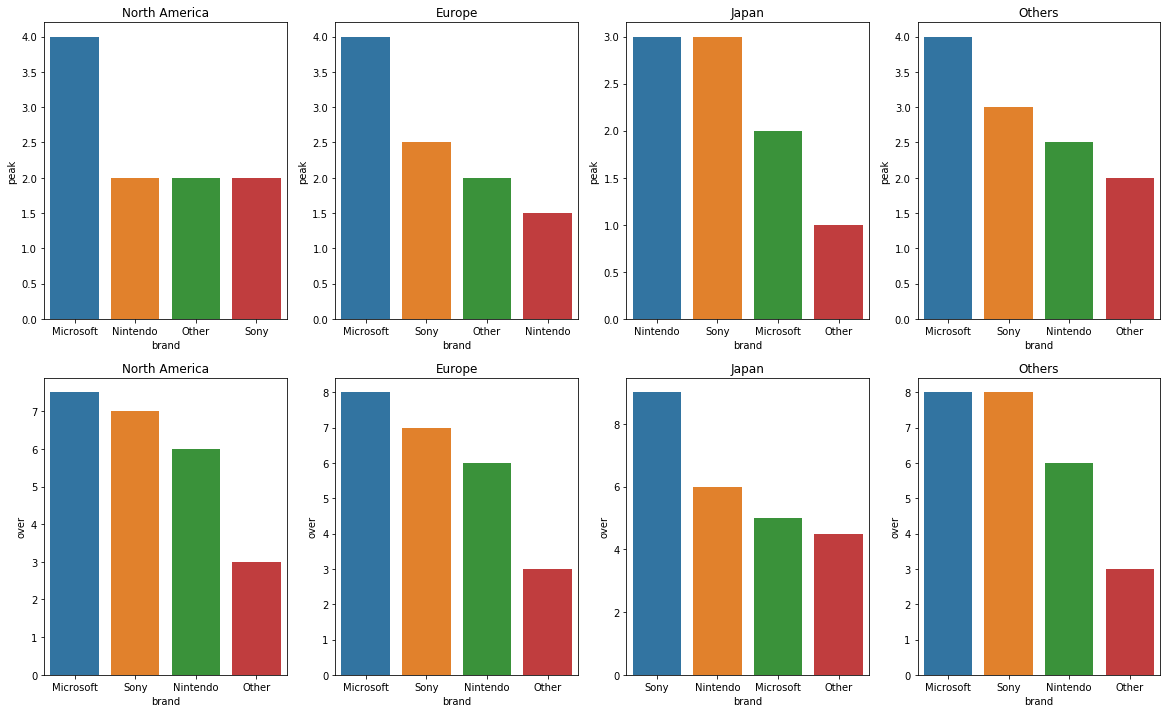

In [28]:
fix, ax= plt.subplots(2,4, figsize= (20,12))

sns.barplot(data= NA_typ.sort_values('peak', ascending= False), y= 'peak', x= 'brand', ax= ax[0,0]).set_title('North America')
sns.barplot(data= EU_typ.sort_values('peak', ascending= False), y= 'peak', x= 'brand', ax= ax[0,1]).set_title('Europe')
sns.barplot(data= JP_typ.sort_values('peak', ascending= False), y= 'peak', x= 'brand', ax= ax[0,2]).set_title('Japan')
sns.barplot(data= others_typ.sort_values('peak', ascending= False), y= 'peak', x= 'brand', ax= ax[0,3]).set_title('Others')

sns.barplot(data= NA_typ.sort_values('over', ascending= False), y= 'over', x= 'brand', ax= ax[1,0]).set_title('North America')
sns.barplot(data= EU_typ.sort_values('over', ascending= False), y= 'over', x= 'brand', ax= ax[1,1]).set_title('Europe')
sns.barplot(data= JP_typ.sort_values('over', ascending= False), y= 'over', x= 'brand', ax= ax[1,2]).set_title('Japan')
sns.barplot(data= others_typ.sort_values('over', ascending= False), y= 'over', x= 'brand', ax= ax[1,3]).set_title('Others')

plt.show()


## What are the latest trends in the industry? 

As we are mainly interested in the most recent trends, it does not make much sense to consider data from all years as this will not be very helpful for us. Thus, the rest on the analysis will only consider data from 2014 onwards. 

In [29]:
games_rel=games.query('year_of_release >= 2014 & platform != "GBA"')

### What are potentially profitable platforms? 

Which platforms are leading in sales? Which ones could increase their market share in the last three year? Which ones are losing traction?

In [30]:
games_rel= games_rel.reset_index(drop= True)

pivot_console= games_rel.pivot_table(index= ['platform','year_of_release'], values= 'total_sales', aggfunc= ['median', 'mean', 'sum', 'count']).reset_index()

pivot_console.columns= ['platform','year', 'median_global_sales', 'mean_global_sales', 'total_global_sales', 'Number_of_games']
pivot_console= pivot_console.sort_values(by= ['platform','year'], ascending= True)
pivot_console['market_share']=(pivot_console.total_global_sales/pivot_console.groupby('year').total_global_sales.transform('sum'))*100

change= pivot_console.pivot_table(index= 'platform', values= ['market_share','total_global_sales'], aggfunc= ['first', 'last']).reset_index()
change.columns= ['platform','market_share14',  'total_sales14', 'market_share16','total_sales16']

change['difference_ms']= round(((change['market_share16']/change['market_share14'])-1)*100,2)
change['difference_ts']= round(((change['total_sales16']/change['total_sales14'])-1)*100,2)

change= change.sort_values('difference_ms', ascending= False)

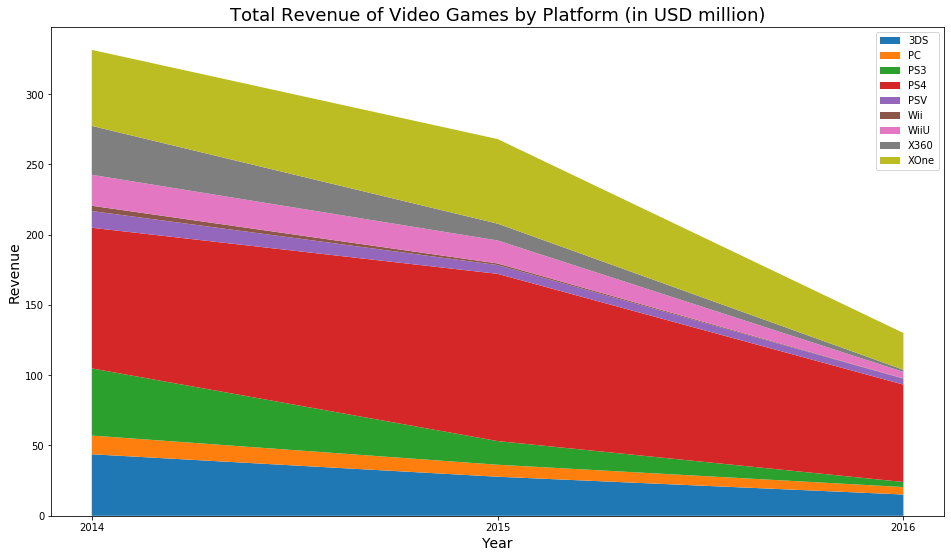

<Figure size 1152x648 with 0 Axes>

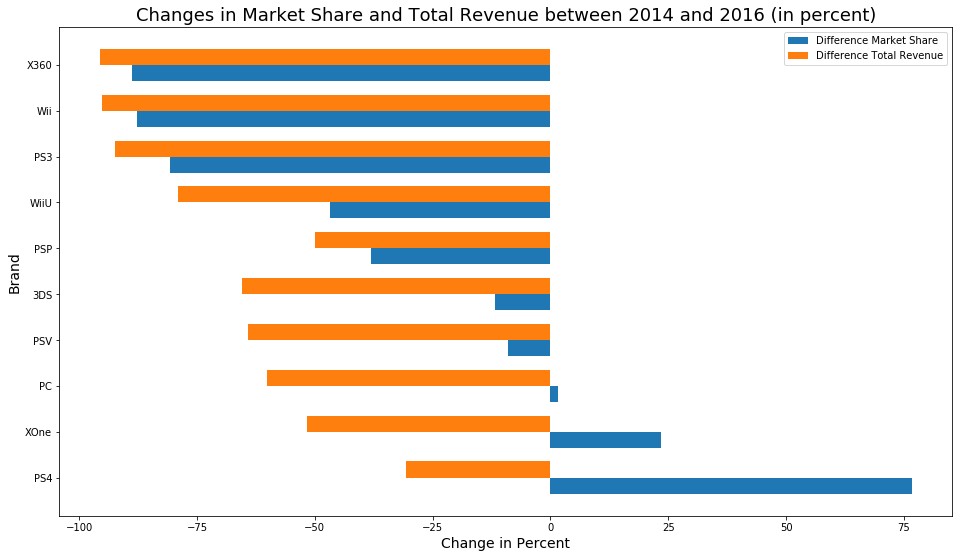

In [31]:
def split(df, group, column):
    gb = df.groupby(group)
    return [gb.get_group(x)[column] for x in gb.groups]


x1= pivot_console['year'].unique()
y1= split(pivot_console.query('platform != "PSP"'), 'platform','total_global_sales')

y2= split(pivot_console.query('platform != "PSP"'), 'platform','market_share')

labels= pivot_console.loc[pivot_console['platform'] != "PSP", 'platform'].unique()

plt.figure(figsize= (16,9))
plt.stackplot(x1,y1, labels= labels)
plt.xticks (pivot_console['year'].unique())
plt.legend(loc='upper right')
plt.title("Total Revenue of Video Games by Platform (in USD million)", fontsize= 18)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Revenue', fontsize= 14)
plt.show()

plt.figure(figsize= (16,9))
width = 0.35 
p= np.arange(len(change['platform'].unique()))
fig,ax=plt.subplots(figsize=(16,9))
rects=ax.barh(p-width/2, change['difference_ms'], width, label= 'Difference Market Share')
rects2= ax.barh(p+width/2, change['difference_ts'], width, label= 'Difference Total Revenue')
plt.title("Changes in Market Share and Total Revenue between 2014 and 2016 (in percent)", fontsize= 18)
ax.set_yticks(p)
ax.set_yticklabels(change['platform'].unique())
ax.legend()
plt.xlabel('Change in Percent', fontsize= 14)
plt.ylabel('Brand', fontsize= 14)
plt.show()

The most popular platforms in terms of market share in 2016: 
- PS4 (53.28 %)
- XOne (20.12 %)
- 3DS (11.64 %)


The fastest growing platforms in terms of market share between 2014 and 2016 
- PS4 (75 %)
- XOne (23.36 %)
- 3DS (1.6 %)


Least popular platforms in 2016:
- PSP (0.04 %)
- Wii (0.14 %)
- X360 (1.17 %)
- PS3 (2.77 %)

The fastest shrinking platforms
- X360 (-88.84 %)
- Wii (- 87.76 %)
- PS3 (- 80.77 %)

As we can see, while there has been a slight reshuffling of market shares, every single platform has decreasing total sales, which implies, they are all beyond their peak age. If this assumption is true, only new platforms could potentially stimulate growth in the industry again. 

Now I will plot the distribution of sales by using boxplots. This will allow us to compare medians as well as the dispersion of the data. Since the data contains quite a few outliers, for the purpose of the boxplot, I will remove outliers. The rest of the analysis will use the original 2014-2016 data set.

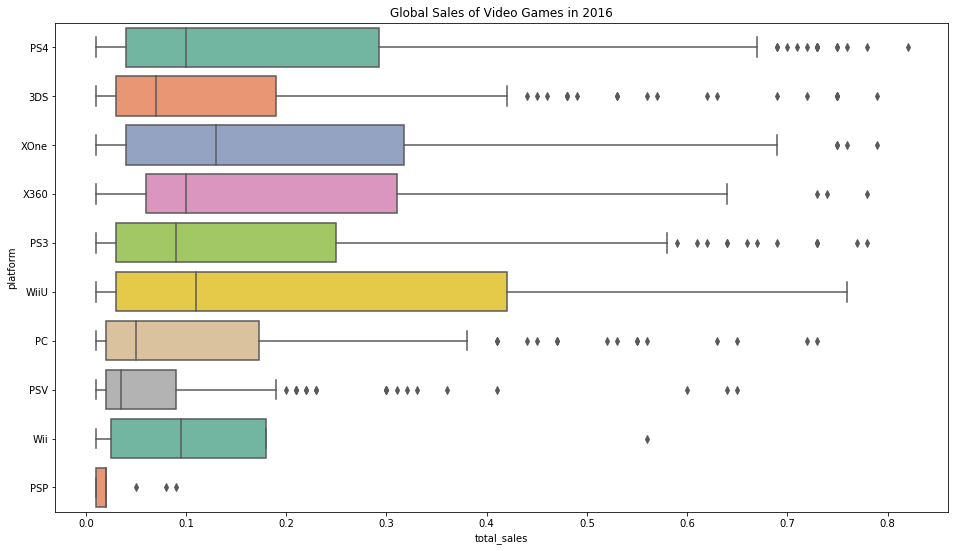

In [32]:
q1= games_rel['total_sales'].quantile(0.25)
q3= games_rel['total_sales'].quantile(0.75)
IQR= q3-q1

games_rel2= games_rel.query('total_sales < @q3 + @IQR*1.5')
a4_dims=(16,9)

fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(ax= ax, x="total_sales", y="platform", data=games_rel2, palette="Set2").set_title('Global Sales of Video Games in 2016')
plt.show()

It seems that the data for WiiU is much more dispersed than for the rest of the columns. Also, the median sales are quite comparable to the market leaders PS4 and XOne. This implies that if a game is released on this platform, chances are it will actually be received well by the audience. Interestingly, PC games are not much dispersed implying a sort of 'immunity' to hypes and a more loyal customer base. 

### Is there a relationship between ratings provided by users or professionals and total sales of PlayStation 4 games? 

So far, we have only looked at sales data by itself. Now, we're going to check whether sales of a game correlate with the ratings provided by users and experts. To do so, I will first plot a scatter matrix and then use a correlation matrix to quantify the degree of association. I will use the spearman rank coefficient since we have a lot of outliers in the data. 

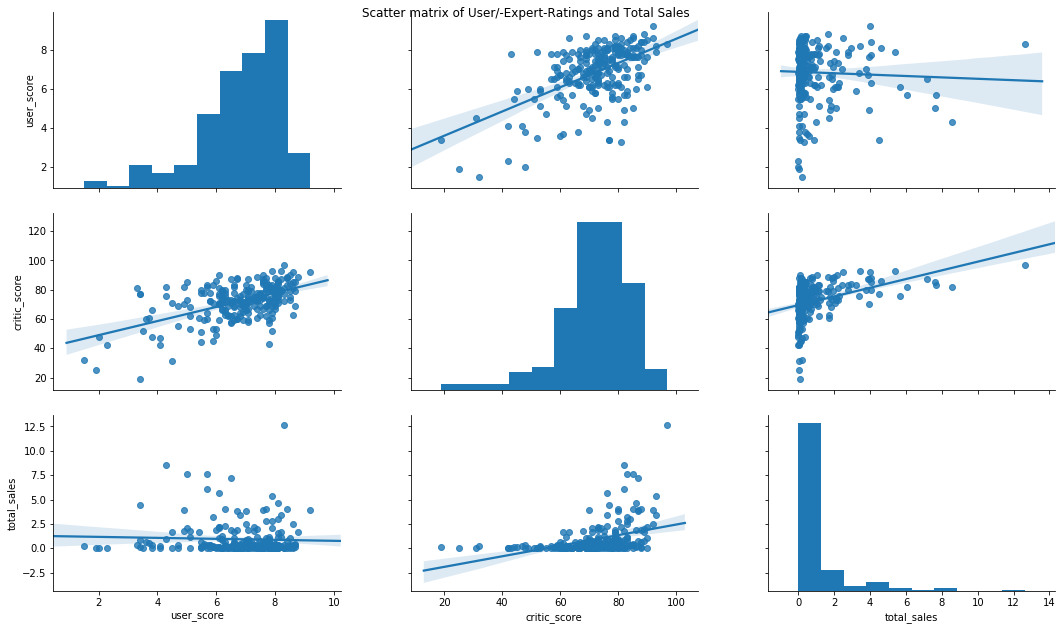

In [33]:
#Scatterplot and heatmap 

#games_rel2['user_score']= games_rel2['user_score'].astype('float')

kurz= games_rel[games_rel['user_score']!= "tbd"]
kurz['user_score']= kurz['user_score'].astype('float')

kurz= kurz.query('(user_score > 0) & (critic_score >0) & (platform == "PS4")')[['user_score', 'critic_score', 'total_sales', 'platform']]

sns.pairplot(kurz, kind= 'reg').fig.set_size_inches(16,9)
plt.suptitle('Scatter matrix of User/-Expert-Ratings and Total Sales')
plt.show()

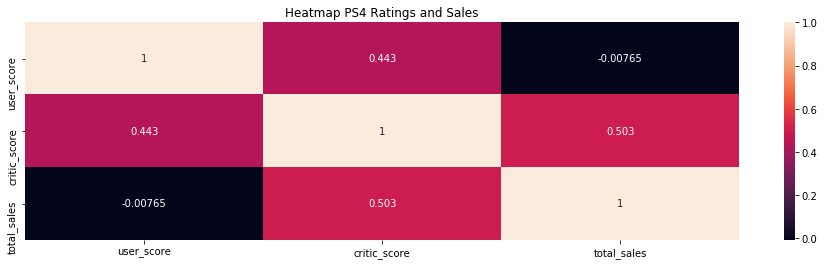

In [34]:
plt.figure(figsize = (16,4))
sns.heatmap(kurz.corr(method= 'spearman'), annot= True, fmt='.3g').set_title('Heatmap PS4 Ratings and Sales')
plt.show()

- For PS4 games, there is a moderate correlation between total sales and expert ratings (spearman coef: 0.503) 
- For PS4 games, there is a moderate correlation between total sales and user ratings (spearman coef: 0.443)  

### How do the same games perform on different platforms? 

Now, I'm going to compare PS4 games that were released on all other platforms to see which platform has an advantage for this particular subset of games. 

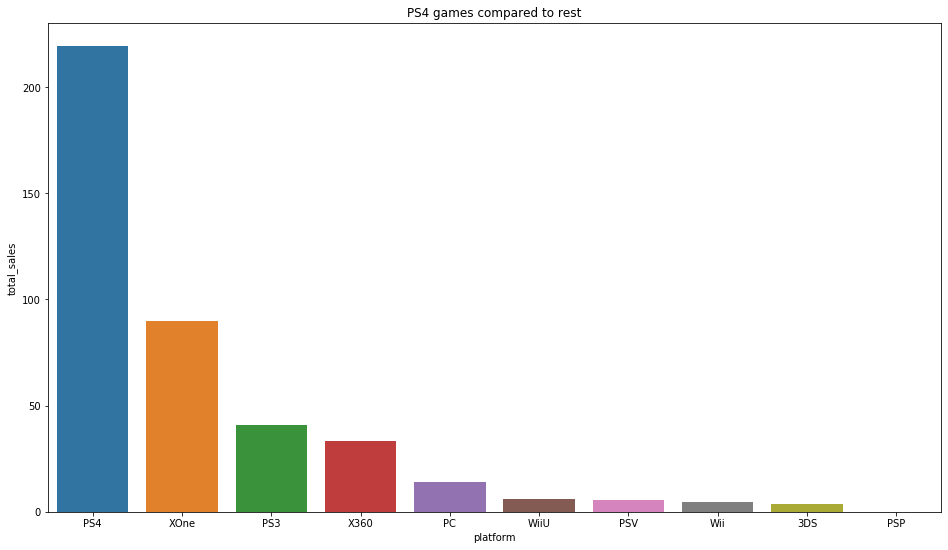

,platform,total_sales
3,PS4,219.46
9,XOne,90.04
2,PS3,40.80
8,X360,33.52
1,PC,13.93
7,WiiU,5.93
5,PSV,5.57
6,Wii,4.62
0,3DS,3.65
4,PSP,0.05


In [35]:
games_rel['user_score']= games_rel['user_score'].astype('float')
PSFOUR= games_rel.query('(user_score > 0) & (critic_score >0) & (platform == "PS4")')['name']

some= games_rel.query('name in @PSFOUR').pivot_table(index= 'platform', values= 'total_sales', aggfunc= 'sum').reset_index().sort_values('total_sales', ascending= False)

#plt.bar(x= some['platform'], y= some['total_sales'])
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data= some, x= 'platform', y= 'total_sales').set_title('PS4 games compared to rest')
plt.show()
some

Looking at the shared games PS4 seems to be by far the most successful platform with 219.46 million USD in revenue since 2014, followed by XOne(90.04 million), PS3 (40.80 million) and X360(33.52 million).
Now I'm going to check the most popular genres in during this time period. 

### What were the most popular genres between 2014 and 2016? 

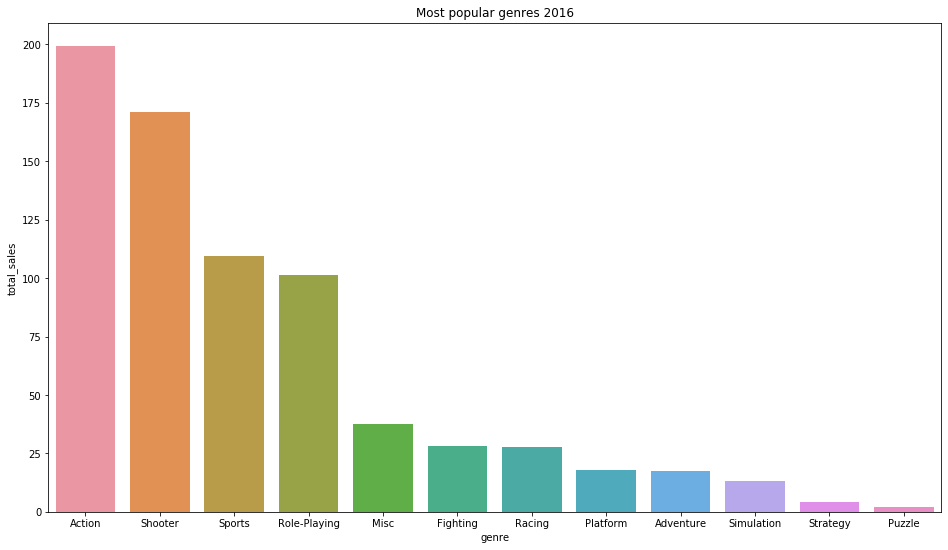

,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


In [36]:
genre_global= games_rel.pivot_table(index= 'genre', values= 'total_sales', aggfunc= 'sum').sort_values('total_sales', ascending= False).reset_index()

fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data= genre_global, x= 'genre', y= 'total_sales')
plt.title('Most popular genres 2016')
plt.show()

genre_global

**Globally, the five most popular genres between 2014 and 2016 were:** 

1. Action (199.36 million)
2. Shooter (170.94 million)
3. Sports (109.48 million)
4. Role-Playing (101.44 million)
5. Misc (37.55 million)

**Globally, the five least popular genres between 2014 and 2016 were:**
1. Puzzle (2.21 million)
2. Strategy (4.01 million)
3. Simulation (13.13 million)
4. Adventure (17.55 million)
5. Platform (18.09 million)


It seems that dynamic games that require more actions per minute (action, role-playing, sports) seem to be more popular than games which require slower thinking such as Puzzles or Strategy Games.

The following part will now break down the global analysis by geographic region. 

# User Profiles of players from various geographic regions

Now, I'm going to compare these figures for different geographic regions. 

In [37]:
profile_platform= games_rel.pivot_table(index= ['platform'], values= ['na_sales', 'eu_sales', 'jp_sales','other_sales'], aggfunc= 'sum').sort_values('na_sales', ascending= False).reset_index()

In [38]:
profile_genres=  games_rel.pivot_table(index= ['genre'], values= ['na_sales', 'eu_sales', 'jp_sales','other_sales'], aggfunc= 'sum').sort_values('na_sales', ascending= False).reset_index()

### Most popular platforms by geographic region

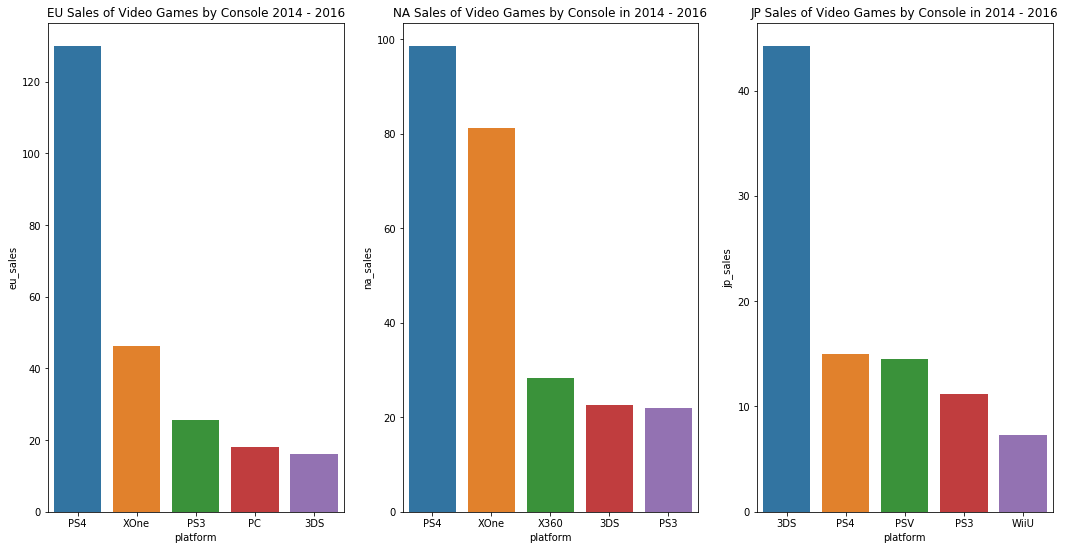

In [39]:
# Most popular consoles by region 

profile_platformEU= profile_platform.sort_values('eu_sales', ascending= False)[0:5]
profile_platformNA= profile_platform.sort_values('na_sales', ascending= False)[0:5]
profile_platformJP= profile_platform.sort_values('jp_sales', ascending= False)[0:5]

fix, ax= plt.subplots(1,3, figsize= (18,9))
sns.barplot(data= profile_platformEU, x= 'platform', y= 'eu_sales', ax= ax[0]).set_title('EU Sales of Video Games by Console 2014 - 2016')
sns.barplot(data= profile_platformNA, x= 'platform', y= 'na_sales', ax= ax[1]).set_title('NA Sales of Video Games by Console in 2014 - 2016')
sns.barplot(data= profile_platformJP, x= 'platform', y= 'jp_sales', ax= ax[2]).set_title('JP Sales of Video Games by Console in 2014 - 2016')
plt.show()

In [40]:
#market shares in percent are calculated here 
profile_platformEU2= profile_platform.sort_values('eu_sales', ascending= False)
profile_platformEU2['market_share_EU']= round((profile_platformEU2['eu_sales']/profile_platformEU2['eu_sales'].sum())*100,2)

profile_platformNA2= profile_platform.sort_values('na_sales', ascending= False)
profile_platformNA2['market_share_NA']= round((profile_platformNA2['na_sales']/profile_platformNA2['na_sales'].sum())*100,2)

profile_platformJP2= profile_platform.sort_values('jp_sales', ascending= False)
profile_platformJP2['market_share_JP']= round((profile_platformJP2['jp_sales']/profile_platformJP2['jp_sales'].sum())*100,2)

***EU market shares 2014-2016:***
   - PS4(48.03 %)
   - XOne(17.08 %)
   - PS3 (9.43 %)
   - PC (6.66 %)
   - 3DS (5.95 %)
   - Others (12.85 %)
    
***NA market shares:***
   - PS4(34.71 %)
   - XOne (28.61 %)
   - X360 (9.96 %)
   - 3DS (7.97 %)
   - PS3 (7.76 %)
   - Others (10.99 %)
   
    
***JP market shares:***
   - 3DS(47.52 %)
   - PS4(16.13 %)
   - PSV (15.62 %)
   - PS3 (12.05 %)
   - WiiU (7.85 %)
   - Others (0.83 %)
   

   
While North America and Europea are quite similar in their console preferences, XBox and PC-gaming is quasi non-existent in Japan. As it seems, the gaming needs of Japanese players are satisfied by their local companies Sony and Nintendo. Another remarkable characteristic is that handheld consoles enjoy a much higher standing in Japan with the 3DS and PSVita both ranking in the top three of the most popular platforms. 

### Most popular genres by geographic region

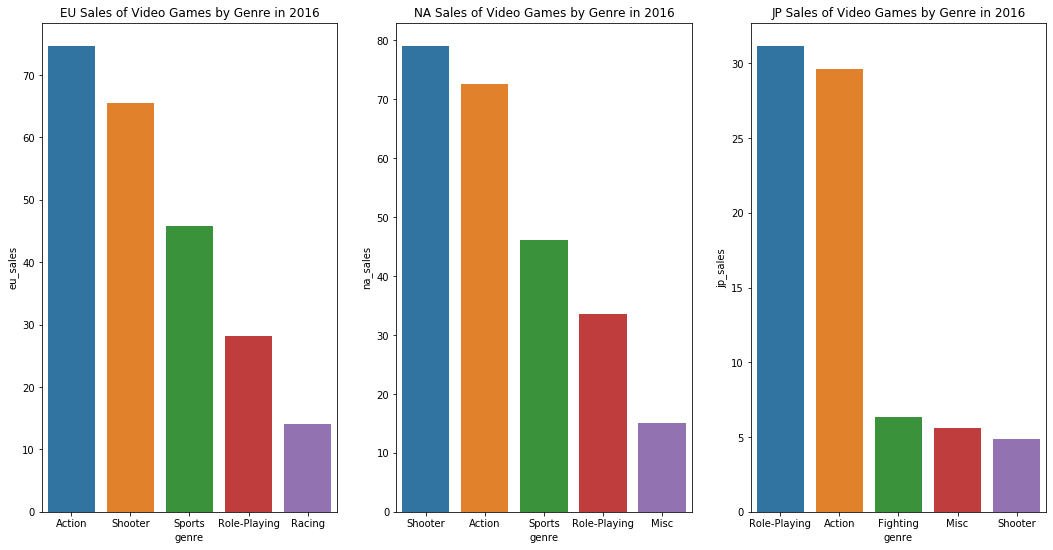

In [41]:
# Most popular genres by regions

profile_genresEU= profile_genres.sort_values('eu_sales', ascending= False)[0:5]
profile_genresNA= profile_genres.sort_values('na_sales', ascending= False)[0:5]
profile_genresJP= profile_genres.sort_values('jp_sales', ascending= False)[0:5]

fix, ax= plt.subplots(1,3, figsize= (18,9))
sns.barplot(data= profile_genresEU, x= 'genre', y= 'eu_sales', ax= ax[0]).set_title('EU Sales of Video Games by Genre in 2016')
sns.barplot(data= profile_genresNA, x= 'genre', y= 'na_sales', ax= ax[1]).set_title('NA Sales of Video Games by Genre in 2016')
sns.barplot(data= profile_genresJP, x= 'genre', y= 'jp_sales', ax= ax[2]).set_title('JP Sales of Video Games by Genre in 2016')
plt.show()

In [42]:
profile_genresEU2= profile_genres.sort_values('eu_sales', ascending= False).reset_index(drop= True)
profile_genresEU2['market_share_EU']= round((profile_genresEU2['eu_sales']/profile_genresEU2['eu_sales'].sum())*100,2)

profile_genresNA2= profile_genres.sort_values('na_sales', ascending= False).reset_index(drop= True)
profile_genresNA2['market_share_NA']= round((profile_genresNA2['na_sales']/profile_genresNA2['na_sales'].sum())*100,2)

profile_genresJP2= profile_genres.sort_values('jp_sales', ascending= False).reset_index(drop= True)
profile_genresJP2['market_share_JP']= round((profile_genresJP2['jp_sales']/profile_genresJP2['jp_sales'].sum())*100,2)


profile_genresEU2['genre'][5:12]= 'Others'     
profile_genresJP2['genre'][5:12]= 'Others' 
profile_genresNA2['genre'][5:12]= 'Others'     

***EU market shares 2014-2016:***
   - Action (27.58 %)
   - Shooter (24.20 %)
   - Sports (16.89 %)
   - Role-Playing (10.41 %) 
   - Racing (5.22 %) 
   - Others (15.70 %)
 
***NA market shares:***
   - Shooter (27.82 %)
   - Action (25.53 %)
   - Sports (16.24 %)
   - Role-Playing (11.78 %) 
   - Misc (5.30%) 
   - Others (13.15 %)
   
    
***JP market shares:***
   - Role-Playing (33.47 %)
   - Action (31.78 %)
   - Fighting (6.84 %)
   - Misc (6.03 %) 
   - Shooter (5.23 %) 
   - Others (16.65%)

   
   
The three regions differ considerably concerning most popular genres. The most remarkable observation is that shooters and sports games are very unpopular in Japan as opposed to the other two regions. This might be due to culturally shaped attitudes towards this type of games. Below you'll find several plots of how genres preferences are distributed across platforms in different regions. 

### Influence of Ratings 

Now, I'm going to check the impact of age ratings on sales of games in each region. 

In [43]:
sit= games_rel.pivot_table(index= 'rating', values= ['eu_sales', 'na_sales', 'jp_sales'], aggfunc= ['sum', 'count']).reset_index()
sit.columns= ['rating','eu_sales_sum', 'jp_sales_sum', 'na_sales_sum', 'eu_sales_count', 'jp_sales_count', 'na_sales_count']
sit= sit.query('eu_sales_count > 2 & rating != "NA"')

sit['eu_salesMean']= round((sit['eu_sales_sum']/sit['eu_sales_count']),4)
sit['na_salesMean']= round((sit['na_sales_sum']/sit['na_sales_count']),4)
sit['jp_salesMean']= round((sit['jp_sales_sum']/sit['jp_sales_count']),4)

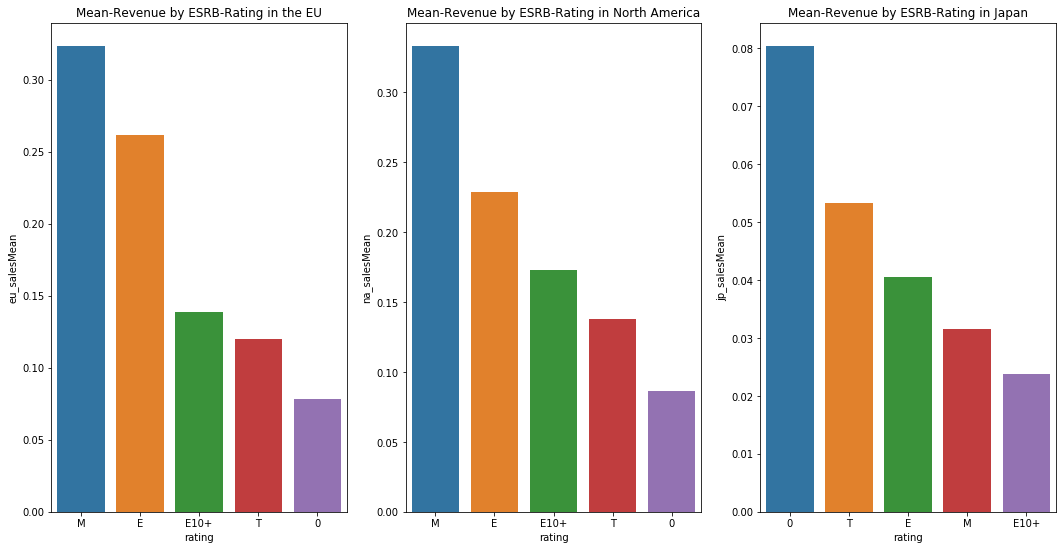

,rating,eu_salesMean,na_salesMean,jp_salesMean
0,0,0.0782,0.0867,0.0804
2,E,0.2619,0.2289,0.0405
3,E10+,0.1385,0.1730,0.0237
4,M,0.3236,0.3332,0.0315
6,T,0.1200,0.1381,0.0533


In [44]:
fix, ax= plt.subplots(1,3, figsize= (18,9))
sns.barplot(data= sit.sort_values('eu_salesMean', ascending= False), x= 'rating', y= 'eu_salesMean', ax= ax[0]).set_title('Mean-Revenue by ESRB-Rating in the EU')
sns.barplot(data= sit.sort_values('na_salesMean', ascending= False), x= 'rating', y= 'na_salesMean', ax= ax[1]).set_title('Mean-Revenue by ESRB-Rating in North America')
sns.barplot(data= sit.sort_values('jp_salesMean', ascending= False), x= 'rating', y= 'jp_salesMean', ax= ax[2]).set_title('Mean-Revenue by ESRB-Rating in Japan')
plt.show()
sit[['rating','eu_salesMean','na_salesMean', 'jp_salesMean']]

While all plots show remarkable variations in sales by esrb_rating we might wanna know, if we should care about the difference. To do so, a Kruskal-Wallis-Test will be used. 

In [45]:
E= games_rel[['eu_sales', 'rating']].query('rating == "E"')['eu_sales']
ETen= games_rel[['eu_sales', 'rating']].query('rating == "E10+"')['eu_sales']
M= games_rel[['eu_sales', 'rating']].query('rating == "M"')['eu_sales']
T= games_rel[['eu_sales', 'rating']].query('rating == "T"')['eu_sales']
ZERO= games_rel[['eu_sales', 'rating']].query('rating == 0')['eu_sales']


alpha= 0.05 

results= st.kruskal(E, ETen, M, T, ZERO)

print('p-value :', results.pvalue)

if results.pvalue < alpha:
    print ('Rating has an important impact on total sales of a game in Europe')
else:
    print ('Rating has no impact on total sales of a game in Europe')

p-value : 1.4660970492870021e-94
Rating has an important impact on total sales of a game in Europe


In [46]:
E= games_rel[['na_sales', 'rating']].query('rating == "E"')['na_sales']
ETen= games_rel[['na_sales', 'rating']].query('rating == "E10+"')['na_sales']
M= games_rel[['na_sales', 'rating']].query('rating == "M"')['na_sales']
T= games_rel[['na_sales', 'rating']].query('rating == "T"')['na_sales']
ZERO= games_rel[['na_sales', 'rating']].query('rating == 0')['na_sales']

alpha= 0.05 

results= st.kruskal(E, ETen, M, T, ZERO)

print('p-value :', results.pvalue)

if results.pvalue < alpha:
    print ('Rating has an important impact on total sales of a game in North America')
else:
    print ('Rating has no impact on total sales of a game in North America')

p-value : 1.1559179726884204e-88
Rating has an important impact on total sales of a game in North America


In [47]:
E= games_rel[['jp_sales', 'rating']].query('rating == "E"')['jp_sales']
ETen= games_rel[['jp_sales', 'rating']].query('rating == "E10+"')['jp_sales']
M= games_rel[['jp_sales', 'rating']].query('rating == "M"')['jp_sales']
T= games_rel[['jp_sales', 'rating']].query('rating == "T"')['jp_sales']
ZERO= games_rel[['jp_sales', 'rating']].query('rating == 0')['jp_sales']

alpha= 0.05 

results= st.kruskal(E, ETen, M, T, ZERO)

print('p-value :', results.pvalue)

if results.pvalue < alpha:
    print ('Rating has an important impact on total sales of a game in Japan')
else:
    print ('Rating has no impact on total sales of a game in Japan')

p-value : 1.7538344960521559e-43
Rating has an important impact on total sales of a game in Japan


As it appears, in all countries, age has a significant impact on the total number of sales of a game. Just in line with the findings from the previous enquiry into the most popular genres, we can see that in Japan games with lesser age restrictions are much more popular while in Western countries, this trend seems to be reversed. 

# Testing hypotheses

Now I'm going to check the following hypotheses: 

H1: Average user ratings of the Xbox One and PC platforms are the same. 
(H0: Average user ratings of the Xbox One and PC platforms are not the same.)

H1: Average user ratings for the Action and Sports genres are different.
(H0: Average user ratings for the Action and Sports genres are not different.)

In order to select the appropriate statistical test, I need to test whehther the distributions in question are normal and whether, they have equal variances. The results of these tests turned out that a 'Mann-Whitney-U-test' was the most adequate approach to deal with these hypotheses. The alpha for each test follows the convention of 0.05.  

In [48]:
XOne= games_rel.query('platform== "XOne" & user_score > 0')['user_score']
PC = games_rel.query('platform== "PC" & user_score > 0')['user_score']

#test for normality

st.shapiro(XOne)

(0.9531636238098145, 2.564911119407043e-05)

The p value is smaller than .05 (the value on the right side) implying that both distributions are not normal

In [49]:
# test for equal variance 

results= st.levene(XOne, PC)

alpha= 0.05 

if results.pvalue < alpha:
    print('Both groups have unequal variances')
else:
    print('Both groups have equal variances')

Both groups have unequal variances


In [50]:
results= st.mannwhitneyu(XOne, PC)



print('Mean User Rating XBox One :', XOne.mean())
print('Median User Rating XBox One :', XOne.median())
print('Mean User Rating PC :', PC.mean())
print('Median User Rating PC :', PC.median())
alpha= 0.05 
print('pvalue :', results.pvalue)
if results.pvalue < alpha:
    print('Average User Ratings are different for both groups ')
else:
    print('Average User Ratings are the same for both groups')

Mean User Rating XBox One : 6.594545454545456
Median User Rating XBox One : 6.8
Mean User Rating PC : 6.293548387096774
Median User Rating PC : 6.8
pvalue : 0.13885838085122326
Average User Ratings are the same for both groups


Following this enquiry, we cannot reject the null hypothesis that average user ratings differ between PC and XOne games (p: 0.18 )

In [51]:
action= games_rel.query('genre== "Action" & user_score > 0')['user_score']
sports = games_rel.query('genre== "Sports" & user_score > 0')['user_score']


st.shapiro(action)

(0.90681391954422, 1.3703333173048504e-12)

The p value is smaller than .05 (the value on the right side) implying that both distributions are not normal

In [52]:
results= st.mannwhitneyu(action, sports)

alpha= 0.05 

print('Mean User Rating Action :', action.mean())
print('Median User Rating Action :', action.median())
print('Mean User Rating Sports :', sports.mean())
print('Median User Rating Action :', sports.median())

print('pvalue :', results.pvalue)
if results.pvalue < alpha:
    print('Average User Ratings are different for both groups ')
else:
    print('Average User Ratings are the same for both groups')

Mean User Rating Action : 6.760606060606061
Median User Rating Action : 7.1
Mean User Rating Sports : 5.2251968503937
Median User Rating Action : 5.5
pvalue : 6.083439640147152e-17
Average User Ratings are different for both groups 


Following this enquiry, we reject the null hypothesis that average user ratings differ between Action and Sports games (p= 0.0003). It seems that players rate action games significantly better than sports games.

# Conclusion

This report has sought to provide an insight into the current state of the video game industry in various geographic regions. Despite the very poor quality of the data, various insights could be drawn that I hope will help the management to better respond to market needs. In the following, I will systematically summarise the key findings of the analysis: 

**Video games industry growth has been in steady decline** 

- Video game sales peaked in 2008 with a total global revenue of  682.72 million
- In 2016 total global revenue of video games were 130.03 million

**The four most popular platforms in history** 
- PlayStation2 (1.25 billion USD revenue) 
- XBox360 (961.42 million) 
- Playstation3 (939.65 million) 
- Nintendo Wii(907.51 million). 

**The typical lifecycle of a console** 

***North America***

- Microsoft: The average duration until sales peak is 4 years. After 7.5 years, the consoles become irrelevant
- Sony: The average duration until sales peak is 2 years. After 7 years, the consoles become irrelevant
- Nintendo: The average duration until sales peak is 2 years. After 6 years, the consoles become irrelevant
- Other: The average duration until sales peak is 2 years. After 3 years, the consoles become irrelevant


***Europe***

- Microsoft: The average duration until sales peak is 4 years. After 8 years, the consoles become irrelevant
- Sony: The average duration until sales peak is 2.5 years. After 7 years, the consoles become irrelevant
- Nintendo: The average duration until sales peak is 1.5 years. After 6 years, the consoles become irrelevant
- Other: The average duration until sales peak is 2 years. After 3 years, the consoles become irrelevant

***Japan***

- Sony: The average duration until sales peak is 3 years. After 9 years, the consoles become irrelevant
- Nintendo: The average duration until sales peak is 3 years. After 6 years, the consoles become irrelevant
- Microsoft: The average duration until sales peak is 2 years. After 5 years, the consoles become irrelevant
- Other: The average duration until sales peak is 1 year. After 4.5 years, the consoles become irrelevant

***Rest of the world*** 

- Microsoft: The average duration until sales peak is 4 years. After 8 years, the consoles become irrelevant
- Sony: The average duration until sales peak is 3 years. After 8 years, the consoles become irrelevant
- Nintendo: The average duration until sales peak is 2.5 years. After 6 years, the consoles become irrelevant
- Other: The average duration until sales peak is 2 years. After 3 years, the consoles become irrelevant

**The most popular platforms in terms of market share in 2016:**

   - PS4 (53.28 %)
   - XOne (20.12 %)
   - 3DS (11.64 %)

**The fastest growing platforms in terms of market share between 2014 and 2016**

   - PS4 (75 %)
   - XOne (23.36 %)
   - 3DS (1.6 %)

**Least popular platforms in 2016:**

   - PSP (0.04 %)
   - Wii (0.14 %)
   - X360 (1.17 %)
   - PS3 (2.77 %)

**The fastest shrinking platforms in terms of marketshare beween 2014 and 2016**

   - X360 (-88.84 %)
   - Wii (- 87.76 %)
   - PS3 (- 80.77 %)

**Relationship between ratings provided by users and critics and sales of PS4 games**

- There is a weak but relevant correlation between total sales and expert ratings (spearman coef: 0.563)
- There is a weak correlation between total sales and user ratings (spearman coef: 0.433)

**Performance of PS4 games on other platforms** 
- Looking at the shared games PS4 seems to be by far the most successful platform with 219.46 million USD in revenue since 2014, followed by XOne(90.04 million), PS3 (40.80 million) and X360(33.52 million).

**Globally, the five most popular genres between 2014 and 2016 were:** 

1. Action (199.36 million)
2. Shooter (170.94 million)
3. Sports (109.48 million)
4. Role-Playing (101.44 million)
5. Misc (37.55 million)

**Globally, the five least popular genres between 2014 and 2016 were:**
1. Puzzle (2.21 million)
2. Strategy (4.01 million)
3. Simulation (13.13 million)
4. Adventure (17.55 million)
5. Platform (18.09 million)


**Most popular platforms by geographic region**

***EU market shares 2014-2016:***
   - PS4(48.03 %)
   - XOne(17.08 %)
   - PS3 (9.43 %)
   - PC (6.66 %)
   - 3DS (5.95 %)
   - Others (12.85 %)
    
***NA market shares:***
   - PS4(34.71 %)
   - XOne (28.61 %)
   - X360 (9.96 %)
   - 3DS (7.97 %)
   - PS3 (7.76 %)
   - Others (10.99 %)
   
    
***JP market shares:***
   - 3DS(47.52 %)
   - PS4(16.13 %)
   - PSV (15.62 %)
   - PS3 (12.05 %)
   - WiiU (7.85 %)
   - Others (0.83 %)

**Most popular genres by geographic region**
***EU market shares 2014-2016:***
   - PS4(48.03 %)
   - XOne(17.08 %)
   - PS3 (9.43 %)
   - PC (6.66 %)
   - 3DS (5.95 %)
   - Others (12.85 %)
    
***NA market shares:***
   - PS4(34.71 %)
   - XOne (28.61 %)
   - X360 (9.96 %)
   - 3DS (7.97 %)
   - PS3 (7.76 %)
   - Others (10.99 %)
   
    
***JP market shares:***
   - 3DS(47.52 %)
   - PS4(16.13 %)
   - PSV (15.62 %)
   - PS3 (12.05 %)
   - WiiU (7.85 %)
   - Others (0.83 %)

***Influence of Age ratings on sales by geographic region***

**Rating has a significant impact on sales of game in Japan (p <0.05)**
- 0: 80,400 USD on average 
- T: 53,300 USD on average
- E: 40,500 USD on average
- M: 31,500 USD on average 
- E10+: 23,700 USD on average 

**Rating has a significant impact on sales of a game in Europe**
- M: 323,600 USD on average
- E: 261,900 USD on average
- E10+: 138,500 USD on average
- T: 120,000 USD on average 
- 0: 78,200 USD on average 

**Rating has a significant impact on sales of a game in North America**
- M: 333,200 USD on average 
- E: 228,900 USD on average 
- T: 138,100 USD on average 
- E10+: 173,000 USD on average 
- 0: 86,700 USD on average 

***Average user ratings do not differ significantly between Xbox One and PC games (p > 0.05)***

- Mean User Rating XBox One : 6.6
- Median User Rating XBox One : 6.8
- Mean User Rating PC : 6.24
- Median User Rating PC : 6.8


***Average user ratings differ significantly between Action and Sports games (p < 0.05)***

- Mean User Rating Action : 6.64
- Median User Rating Action : 6.9
- Mean User Rating Sports : 5.43
- Median User Rating Action : 6.0

As a more general observation, the data suggests that the industry is in an innovation crisis. No console is able to attract customer's attention the way the PS2 or Xbox360 did. It seems that there needs to be a new 'big thing'  to reverse the downfall of the industry. 

I hope these insights will help the management to adjust the advertisement as well as the composition of games offered on the website. Feel free to let me know, if clarification on any of the components presented in the analysis is needed. 